<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_3_6)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-3.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-3.6_n20.csv',
 'data_multi_delta_-3.6_n30.csv',
 'data_multi_delta_-3.6_n60.csv',
 'data_multi_delta_-3.6_n120.csv',
 'data_multi_delta_-3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,42.790055,-0.001377,52.788678,52.789861,-0.001183
1,0.0,1.0,39.656190,-0.001579,49.654611,49.655982,-0.001372
2,0.0,2.0,33.140496,0.002155,43.142651,43.140260,0.002390
3,0.0,3.0,62.865143,0.000643,72.865786,72.865036,0.000750
4,0.0,4.0,82.212021,0.000044,92.212065,92.211997,0.000067
...,...,...,...,...,...,...,...
19995,999.0,15.0,65.358079,-0.000333,75.357747,75.357926,-0.000179
19996,999.0,16.0,30.174941,-0.001670,40.173272,40.173899,-0.000627
19997,999.0,17.0,69.082812,0.000586,79.083398,79.082752,0.000646
19998,999.0,18.0,32.706154,-0.000893,42.705261,42.705176,0.000085


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,42.790055,-0.001377,52.788678,52.789861,-0.001183
1,0.0,1.0,39.656190,-0.001579,49.654611,49.655982,-0.001372
2,0.0,2.0,33.140496,0.002155,43.142651,43.140260,0.002390
3,0.0,3.0,62.865143,0.000643,72.865786,72.865036,0.000750
4,0.0,4.0,82.212021,0.000044,92.212065,92.211997,0.000067
...,...,...,...,...,...,...,...
19995,999.0,15.0,65.358079,-0.000333,75.357747,75.357926,-0.000179
19996,999.0,16.0,30.174941,-0.001670,40.173272,40.173899,-0.000627
19997,999.0,17.0,69.082812,0.000586,79.083398,79.082752,0.000646
19998,999.0,18.0,32.706154,-0.000893,42.705261,42.705176,0.000085


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    42.790055 -0.001377  52.788678  52.789861 -0.001183
      1.0    39.656190 -0.001579  49.654611  49.655982 -0.001372
      2.0    33.140496  0.002155  43.142651  43.140260  0.002390
      3.0    62.865143  0.000643  72.865786  72.865036  0.000750
      4.0    82.212021  0.000044  92.212065  92.211997  0.000067
...                ...       ...        ...        ...       ...
999.0 15.0   65.358079 -0.000333  75.357747  75.357926 -0.000179
      16.0   30.174941 -0.001670  40.173272  40.173899 -0.000627
      17.0   69.082812  0.000586  79.083398  79.082752  0.000646
      18.0   32.706154 -0.000893  42.705261  42.705176  0.000085
      19.0   42.218108 -0.000193  52.217915  52.217369  0.000546

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    42.790055 -0.001377  52.788678  52.789861 -0.001183
      1.0    39.656190 -0.001579  49.654611  49.655982 -0.001372
      2.0    33.140496  0.002155  43.142651  43.140260  0.002390
      3.0    62.865143  0.000643  72.865786  72.865036  0.000750
      4.0    82.212021  0.000044  92.212065  92.211997  0.000067
...                ...       ...        ...        ...       ...
999.0 15.0   65.358079 -0.000333  75.357747  75.357926 -0.000179
      16.0   30.174941 -0.001670  40.173272  40.173899 -0.000627
      17.0   69.082812  0.000586  79.083398  79.082752  0.000646
      18.0   32.706154 -0.000893  42.705261  42.705176  0.000085
      19.0   42.218108 -0.000193  52.217915  52.217369  0.000546

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,42.790055,-0.001377,52.788678,52.789861,-0.001183
1,0.0,1.0,39.656190,-0.001579,49.654611,49.655982,-0.001372
2,0.0,2.0,33.140496,0.002155,43.142651,43.140260,0.002390
3,0.0,3.0,62.865143,0.000643,72.865786,72.865036,0.000750
4,0.0,4.0,82.212021,0.000044,92.212065,92.211997,0.000067
...,...,...,...,...,...,...,...
19995,999.0,15.0,65.358079,-0.000333,75.357747,75.357926,-0.000179
19996,999.0,16.0,30.174941,-0.001670,40.173272,40.173899,-0.000627
19997,999.0,17.0,69.082812,0.000586,79.083398,79.082752,0.000646
19998,999.0,18.0,32.706154,-0.000893,42.705261,42.705176,0.000085


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    42.790055 -0.001377  52.788678  52.789861 -0.001183
      1.0    39.656190 -0.001579  49.654611  49.655982 -0.001372
      2.0    33.140496  0.002155  43.142651  43.140260  0.002390
      3.0    62.865143  0.000643  72.865786  72.865036  0.000750
      4.0    82.212021  0.000044  92.212065  92.211997  0.000067
...                ...       ...        ...        ...       ...
999.0 15.0   65.358079 -0.000333  75.357747  75.357926 -0.000179
      16.0   30.174941 -0.001670  40.173272  40.173899 -0.000627
      17.0   69.082812  0.000586  79.083398  79.082752  0.000646
      18.0   32.706154 -0.000893  42.705261  42.705176  0.000085
      19.0   42.218108 -0.000193  52.217915  52.217369  0.000546

[20000 rows x 5 columns]

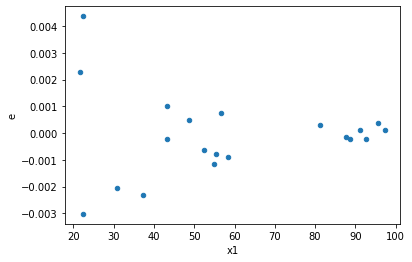

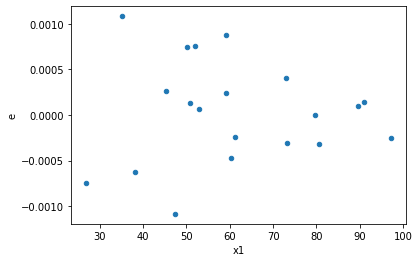

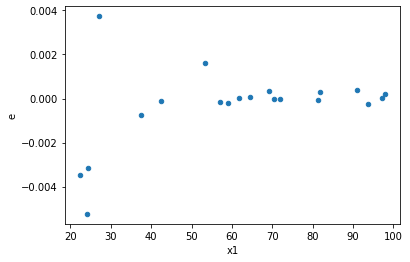

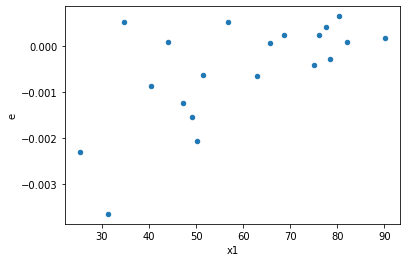

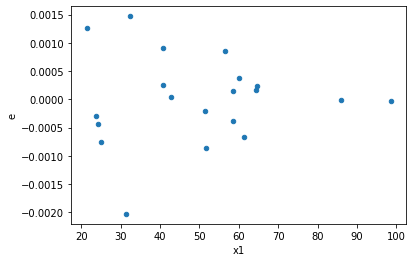

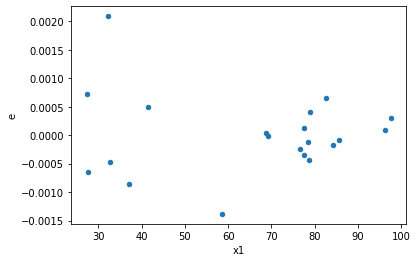

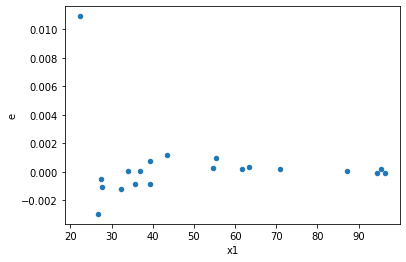

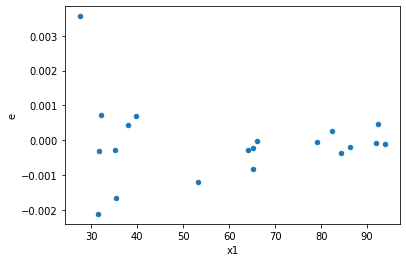

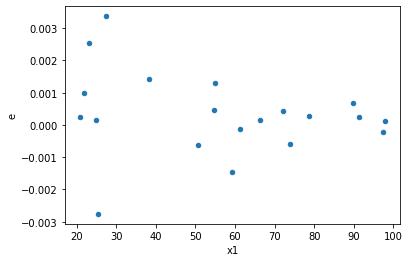

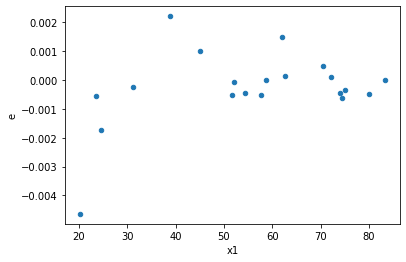

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
263.0,7.0,7.0,1.6599810799413675e-06,1.688508255122997e-06,2.3714015427733822e-07,2.41215465017571e-07,1.0171852411610842,0.982645436986916,0.508677281506542,0.491322718493458,Reject005=1 : Homoscedasticity
402.0,7.0,7.0,4.4359367186951743e-07,1.002119326761835e-06,6.33705245527882e-08,1.4315990382311926e-07,2.259092927404535,0.3044028519634798,0.8477985740182601,0.1522014259817399,Reject005=1 : Homoscedasticity
830.0,7.0,7.0,3.4128277488591616e-06,3.854183773178142e-06,4.875468212655945e-07,5.505976818825917e-07,1.1293226780831576,0.8766530220996356,0.5616734889501822,0.4383265110498178,Reject005=1 : Homoscedasticity
891.0,7.0,7.0,7.654107145785838e-07,1.2689508914619477e-06,1.0934438779694053e-07,1.8127869878027824e-07,1.6578692554109342,0.5208003444712659,0.7395998277643671,0.26040017223563294,Reject005=1 : Homoscedasticity
937.0,7.0,7.0,5.90010812546163e-07,9.452787386097895e-07,8.428725893516614e-08,1.350398198013985e-07,1.6021379922352355,0.5491247914857538,0.7254376042571231,0.2745623957428769,Reject005=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,1.0071974089114747e-05,1.1699314130362313e-06,1.4388534413021067e-06,1.671330590051759e-07,0.11615711107722476,0.010976138067054188,Reject005=0 : Heteroscedasticity
1.0,7.0,7.0,8.327225769575552e-06,9.161307634962483e-07,1.189603681367936e-06,1.308758233566069e-07,0.11001632342471539,0.009349460986917663,Reject005=0 : Heteroscedasticity
2.0,7.0,7.0,7.596271931216208e-06,1.0679956262349915e-06,1.0851817044594583e-06,1.5257080374785592e-07,0.14059470697015963,0.0190601074075132,Reject005=0 : Heteroscedasticity
3.0,7.0,7.0,3.7374742082502053e-06,7.301010473452272e-07,5.339248868928865e-07,1.0430014962074674e-07,0.19534610987644588,0.04688513260180977,Reject005=0 : Heteroscedasticity
4.0,7.0,7.0,2.9312723100707448e-05,1.618200385998393e-06,4.1875318715296355e-06,2.3117148371405614e-07,0.05520471026996937,0.0010998991273172903,Reject005=0 : Heteroscedasticity
5.0,7.0,7.0,4.652005282746609e-06,1.4681561300933516e-06,6.645721832495155e-07,2.0973659001333594e-07,0.31559640216627866,0.1510776372711585,Reject005=1 : Homoscedasticity
6.0,7.0,7.0,4.880057897924524e-06,2.4746235423327286e-06,6.97151128274932e-07,3.535176489046755e-07,0.5070889719126446,0.3902866191052572,Reject005=1 : Homoscedasticity
7.0,7.0,7.0,5.08741302520982e-05,5.551297655172276e-07,7.267732893156885e-06,7.93042522167468e-08,0.010911828128881524,4.76580497406145e-06,Reject005=0 : Heteroscedasticity
8.0,7.0,7.0,6.687066664137723e-05,7.59379932539393e-07,9.552952377339605e-06,1.0848284750562758e-07,0.011355949786053355,5.466881839997736e-06,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    933
Reject005=1 : Homoscedasticity       67
Name: Result_test, dtype: int64